## DS593: Assignment 3 Notebook
Just my working notes here. Final polished answers go in the report.


In [37]:
from IPython.display import Image

## Part 1: Plain Aggregates and Privacy


In [38]:
# Call the client to retrieve the count of users by age who like music
!python3 client.py count age music


| age                           | music                         | COUNT                         | 
| 19                            | Pop                           | 1                             | 
| 20                            | Pop                           | 1                             | 
| 21                            | Country                       | 1                             | 
| 21                            | Pop                           | 1                             | 
| 21                            | Rock                          | 1                             | 
| 22                            | Country                       | 1                             | 
| 22                            | Pop                           | 4                             | 
| 22                            | Rock                          | 1                             | 
| 23                            | Hip Hop                       | 2                             | 
| 23     

### Linking Attack - Reasoning and Public Information

After reviewing the aggregate results, I searched for publicly available information about **Kinan Bab** to see whether I could connect any of it to the dataset.

---

### Question 1

> What can you nevertheless learn about Kinan's musical tastes?
> What possible genres might they have chosen?
> Alternatively, what genres is it impossible for them to have chosen?

#### Answer - Music Preference
Obviously Kinan should be more than 27 at least so we can execluse all the answers below that.
Now we will stalk Kinan to know the answer.


From different public sources, I found the following clues:

* On **X (formerly Twitter)**, I found a friend of Kinan’s replying to him in posts that frequently mentioned *metal* music.
* On **Kinan’s personal website**, he referenced the metal band *Vildhjarta*, specifically their album *“+ där skogen sjunger under evighetens granar +”* (which is metal).
* Based on Kinan’s personality, *pop* seems too ordinary for him 😄

All this strongly suggests that **metal** is Kinan’s preferred music genre.

---

### Question 2

> What did you find out about Kinan? Are your findings consistent with Question 1?
> Combine the two together to learn Kinan's exact age.

#### Answer - Age Estimation

On [**LinkedIn**](https://www.linkedin.com/in/kinanbab/), Kinan lists his education timeline:

* Bachelor’s degree: around **2012 - 2015**
* Master’s degree: around **2016 - 2020**
* PhD: completed in **2025**

Assuming a typical academic path:

* Start Bachelor’s at 18 → finish at 22 (4 years)
* Master’s 23 → 27 (4 years)
* PhD 27 → 31 (5 years)

This suggests Kinan’s current age is approximately **31 years old**.

Comparing this to the dataset (most people 19 - 25), it is clear that he is older. The only other possible age is 32.

Why not 32? The dataset shows that ages 31 and 32 each have only one record. He could be either the metal or pop entry, but based on personality and prior findings, **metal fits best**.

---

### Linking the Aggregate Data

By combining these insights:

* The dataset shows counts by **(age, genre)**
* From public data, we know Kinan is **31 years old** and prefers **metal**
* If the aggregate output contains `(age = 31, genre = metal)` with a **count of 1**, that record almost certainly corresponds to **Kinan Bab**

Even though the dataset contains *no explicit identifiers*, linking publicly available information allows **re-identification**.





In [39]:
# Call the client to retrieve the count of users by age and color preference
!python3 client.py count age color


| age                           | color                         | COUNT                         | 
| 19                            | Blue                          | 1                             | 
| 20                            | Blue                          | 1                             | 
| 21                            | Black                         | 1                             | 
| 21                            | Green                         | 2                             | 
| 22                            | Black                         | 2                             | 
| 22                            | Blue                          | 4                             | 
| 23                            | Black                         | 2                             | 
| 23                            | Yellow                        | 1                             | 
| 24                            | Blue                          | 2                             | 
| 24     

### Question 3

> Identify Kinan's favorite color. What is it? How easy or obvious is this to do, and why?

#### Answer - Favorite Color

Since we already know Kinan is 31 years old and loves *metal* music, we can reasonably guess that his favorite color is **black** from the dataset. 
Also, it fits his musical taste and overall aesthetic.


In [40]:
# Call the client to retrieve the count of users by age group and sport preference
!python3 client.py count agegroup sport


| agegroup                      | sport                         | COUNT                         | 
| 15-20                         | Basketball                    | 1                             | 
| 20-25                         | American Football             | 1                             | 
| 20-25                         | Baseball                      | 3                             | 
| 20-25                         | Basketball                    | 5                             | 
| 20-25                         | E-Sports                      | 4                             | 
| 20-25                         | Hockey                        | 3                             | 
| 25-30                         | American Football             | 1                             | 
| 25-30                         | E-Sports                      | 2                             | 
| 25-30                         | Hockey                        | 2                             | 
| 25-30  

### Question 4

> What information can you learn about Kinan's favorite sport from the above query?

#### Answer - Favorite Sport Reasoning

This one is a bit trickier because I don’t know his exact age group bucket. Since Kinan is above 30, I can ignore all responses from people under 30 and focus on the last two groups.

If the data is sorted, the last two rows (ages 31 and 32) each have only one record. My guess is **baseball** is Kinan’s favorite sport.  

If the data isn’t sorted, the options could be **baseball** or **e-sports**. 

Last year's table: 


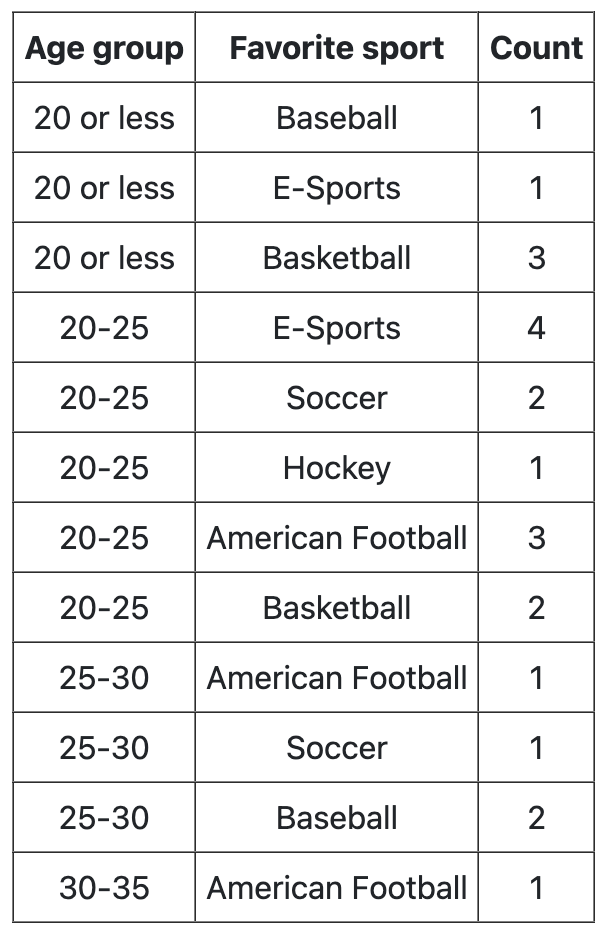

Using last year’s table and the overlap with this dataset:

- Kinan’s age last year would have been around 30 or 31  
- That places him among the last four rows of the table  
- The only matching option between datasets is **baseball**  

So based on context and dataset overlap, **baseball** seems most likely.


---

### Question 5

> What is Kinan's favorite sport?

#### Answer - Final Guess

Putting it all together from the reasoning above:  
**Kinan’s favorite sport is baseball**.  

## Part 2: Implementing Differential Privacy

In [41]:
# Call the client to retrieve the count of users' age and music preferences again 
!python3 client.py count age music


| age                           | music                         | COUNT                         | 
| 19                            | Pop                           | 1                             | 
| 20                            | Pop                           | 1                             | 
| 21                            | Country                       | 1                             | 
| 21                            | Pop                           | 1                             | 
| 21                            | Rock                          | 1                             | 
| 22                            | Country                       | 1                             | 
| 22                            | Pop                           | 4                             | 
| 22                            | Rock                          | 1                             | 
| 23                            | Hip Hop                       | 2                             | 
| 23     

I will try the following epsillon values [0.01, 0.05, 0.1, 0.5, 1, 5, 10]

Using epsilon = 0.01

| age                           | music                         | COUNT                         | 
| 19                            | Pop                           | 106                           | 
| 20                            | Pop                           | 156                           | 
| 21                            | Country                       | 18                            | 
| 21                            | Pop                           | 62                            | 
| 21                            | Rock                          | -6                            | 
| 22                            | Country                       | 266                           | 
| 22                            | Pop                           | -61                           | 
| 22                            | Rock                          | 112                           | 
| 23                            | Hip Hop                       | 71                   

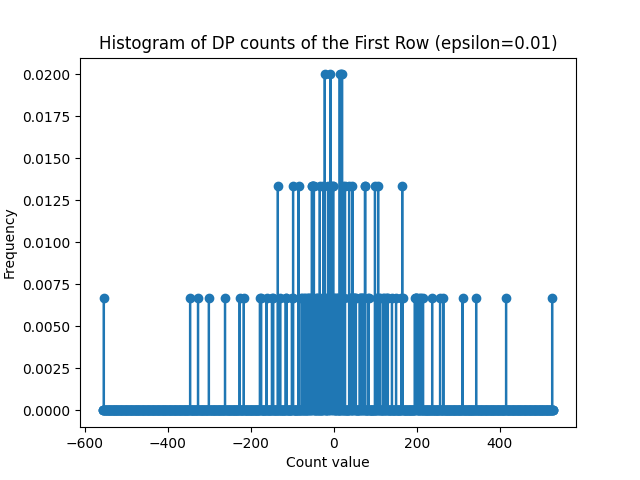

In [42]:
# Run the differential privacy script with a specified epsilon value - small value
!python3 dp.py 0.01
Image('dp-plot.png')

Using epsilon = 0.1

| age                           | music                         | COUNT                         | 
| 19                            | Pop                           | -6                            | 
| 20                            | Pop                           | -4                            | 
| 21                            | Country                       | 12                            | 
| 21                            | Pop                           | 4                             | 
| 21                            | Rock                          | 4                             | 
| 22                            | Country                       | 0                             | 
| 22                            | Pop                           | 18                            | 
| 22                            | Rock                          | 10                            | 
| 23                            | Hip Hop                       | 29                    

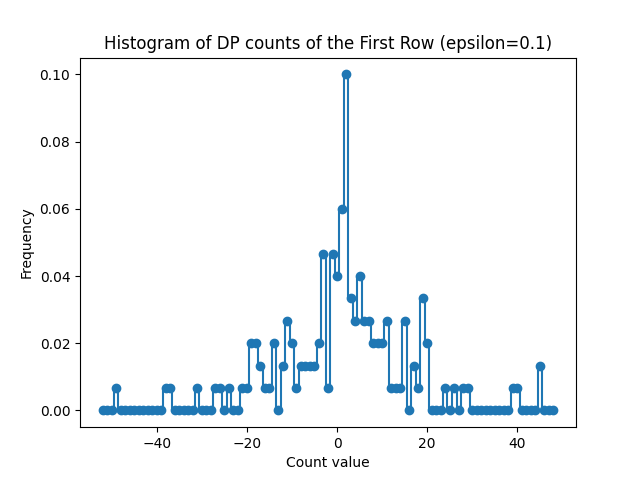

In [43]:
# Run the differential privacy script with a specified epsilon value - small value
!python3 dp.py 0.1
Image('dp-plot.png')

Using epsilon = 0.05

| age                           | music                         | COUNT                         | 
| 19                            | Pop                           | -5                            | 
| 20                            | Pop                           | -25                           | 
| 21                            | Country                       | -16                           | 
| 21                            | Pop                           | -1                            | 
| 21                            | Rock                          | -39                           | 
| 22                            | Country                       | 26                            | 
| 22                            | Pop                           | -30                           | 
| 22                            | Rock                          | 5                             | 
| 23                            | Hip Hop                       | -3                   

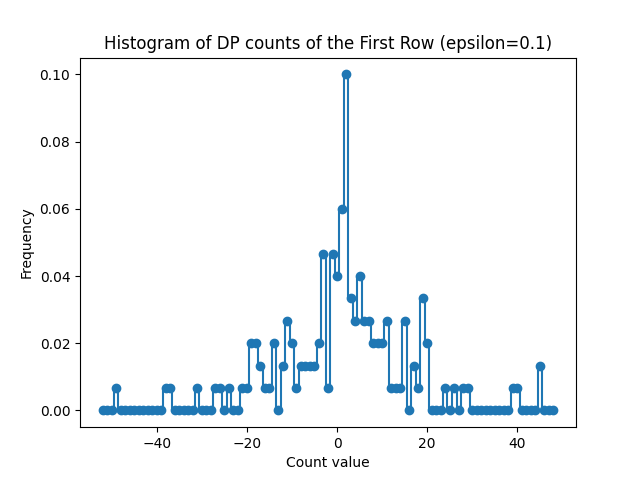

In [44]:
# Run the differential privacy script with a specified epsilon value - small value
!python3 dp.py 0.05
Image('dp-plot.png')

Using epsilon = 0.5

| age                           | music                         | COUNT                         | 
| 19                            | Pop                           | 4                             | 
| 20                            | Pop                           | 2                             | 
| 21                            | Country                       | 6                             | 
| 21                            | Pop                           | 3                             | 
| 21                            | Rock                          | 1                             | 
| 22                            | Country                       | -1                            | 
| 22                            | Pop                           | 1                             | 
| 22                            | Rock                          | 0                             | 
| 23                            | Hip Hop                       | 1                     

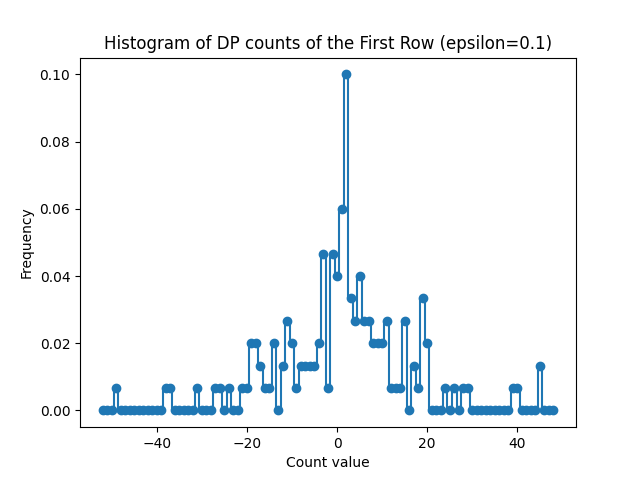

In [45]:
# Run the differential privacy script with a specified epsilon value - medium
!python3 dp.py 0.5
Image('dp-plot.png')

Using epsilon = 1.0

| age                           | music                         | COUNT                         | 
| 19                            | Pop                           | 0                             | 
| 20                            | Pop                           | 3                             | 
| 21                            | Country                       | 3                             | 
| 21                            | Pop                           | 1                             | 
| 21                            | Rock                          | 1                             | 
| 22                            | Country                       | 1                             | 
| 22                            | Pop                           | 6                             | 
| 22                            | Rock                          | 0                             | 
| 23                            | Hip Hop                       | 0                     

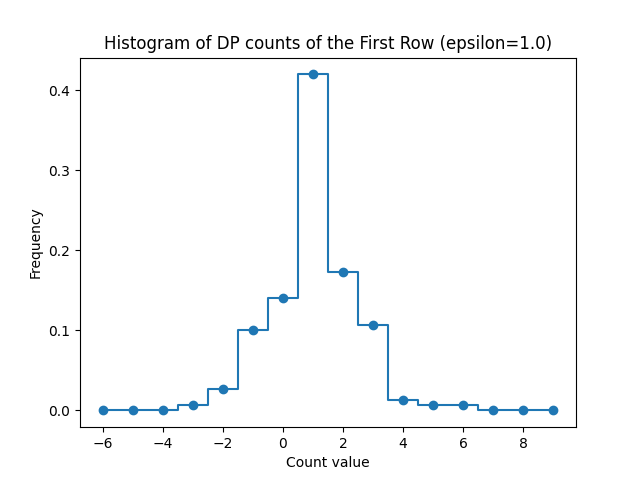

In [46]:
# Run the differential privacy script with a specified epsilon value - large
!python3 dp.py 1.0
Image('dp-plot.png')

Using epsilon = 5.0

| age                           | music                         | COUNT                         | 
| 19                            | Pop                           | 1                             | 
| 20                            | Pop                           | 1                             | 
| 21                            | Country                       | 1                             | 
| 21                            | Pop                           | 1                             | 
| 21                            | Rock                          | 1                             | 
| 22                            | Country                       | 1                             | 
| 22                            | Pop                           | 3                             | 
| 22                            | Rock                          | 1                             | 
| 23                            | Hip Hop                       | 2                     

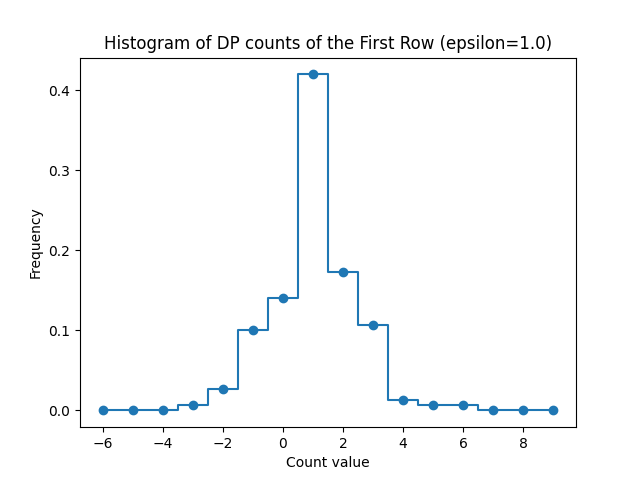

In [47]:
# Run the differential privacy script with a specified epsilon value - large
!python3 dp.py 5.0
Image('dp-plot.png')

Using epsilon = 10.0

| age                           | music                         | COUNT                         | 
| 19                            | Pop                           | 1                             | 
| 20                            | Pop                           | 1                             | 
| 21                            | Country                       | 1                             | 
| 21                            | Pop                           | 1                             | 
| 21                            | Rock                          | 1                             | 
| 22                            | Country                       | 1                             | 
| 22                            | Pop                           | 4                             | 
| 22                            | Rock                          | 1                             | 
| 23                            | Hip Hop                       | 2                    

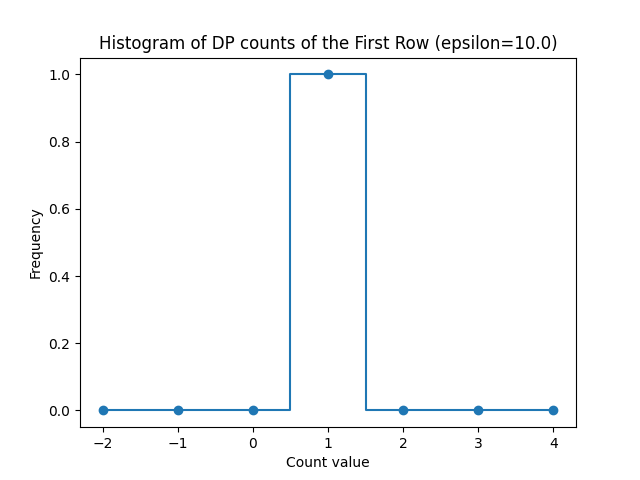

In [48]:
# Run the differential privacy script with a specified epsilon value - very large
!python3 dp.py 10.0
Image('dp-plot.png')


| age                           | music                         | COUNT                         | 
| 19                            | Pop                           | 1                             | 
| 20                            | Pop                           | 1                             | 
| 21                            | Country                       | 1                             | 
| 21                            | Pop                           | 1                             | 
| 21                            | Rock                          | 1                             | 
| 22                            | Country                       | 1                             | 
| 22                            | Pop                           | 4                             | 
| 22                            | Rock                          | 1                             | 
| 23                            | Hip Hop                       | 2                             | 
| 23     

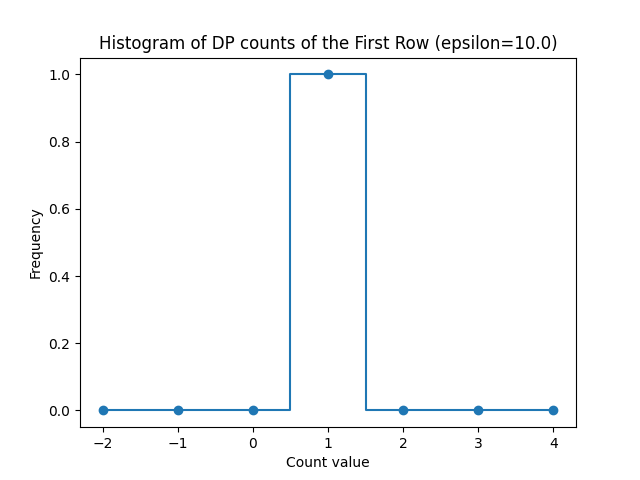

In [49]:
# Now i will call the client again and then call the dp script with epsilon 0.5 to see the difference
!python3 client.py count age music
!python3 dp.py 0.5
Image('dp-plot.png')

### Question 6

> What happens with different ε values?

#### Answer - Observations

I ran `dp.py` with different ε values and noticed:

- **Big ε (1, 5, 10)**  
  - The counts stayed pretty close to the real values.  
  - The histogram looks accurate.  
  - Privacy is weaker since you could tell more about individual data.

- **Medium ε (0.5)**  
  - The noise is noticeable but not crazy.  
  - Some counts can still go negative, but overall it’s a good balance between privacy and accuracy.

- **Small ε (0.1, 0.05, 0.01)**  
  - The noise gets huge, sometimes giving really high or negative counts.  
  - Privacy is strong, but the histogram doesn’t look very realistic.

**In short:**  
- Small ε → strong privacy, noisy counts, some negative.  
- Medium ε (0.5) → decent privacy, mostly reasonable counts.  
- Large ε → weak privacy, counts close to true values.  


| age                           | music                         | COUNT                         | 
| 19                            | Pop                           | 1                             | 
| 20                            | Pop                           | 1                             | 
| 21                            | Country                       | 1                             | 
| 21                            | Pop                           | 1                             | 
| 21                            | Rock                          | 1                             | 
| 22                            | Country                       | 1                             | 
| 22                            | Pop                           | 4                             | 
| 22                            | Rock                          | 1                             | 
| 23                            | Hip Hop                       | 2                             | 
| 23     

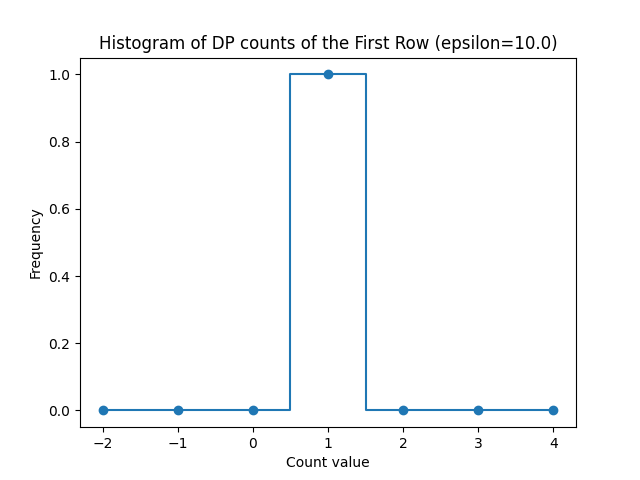

In [50]:
# Okay let's run with epsilon = 0.5 again to answer question 7 compared to the original one
!python3 client.py count age music
!python3 dp.py 0.5
Image('dp-plot.png')

array([0, 0, 1, 3, 2, 1, 1, 1, 0, 3, 3, 0, 5, 0, 1, 2, 0, 3, 0, 0, 0, 0,
       4, 1, 0, 1, 2, 0, 3, 0, 0, 1, 3, 3, 0, 0, 0, 0, 1, 5, 2, 5, 0, 0,
       1, 4, 2, 8, 1, 0, 5, 2, 3, 5, 2, 5, 2, 4, 1, 2, 0, 2, 8, 1, 1, 1,
       1, 2, 3, 3, 0, 0, 0, 1, 0, 4, 1, 0, 2, 1, 0, 4, 1, 2, 8, 2, 4, 2,
       2, 2, 6, 1, 1, 2, 3, 1, 3, 7, 1, 4, 0, 0, 2, 3, 3, 0, 2, 1, 0, 0,
       0, 1, 1, 2, 0, 2, 1, 0, 3, 5, 2, 0, 3, 0, 0, 0, 4, 0, 6, 3, 1, 3,
       2, 1, 4, 4, 0, 1, 8, 4, 0, 0, 4, 3, 3, 0, 0, 0, 4, 0])

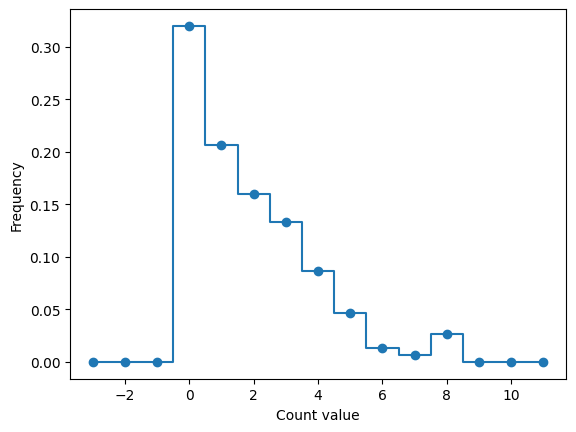

In [51]:
# Then we will call plot function to generate the plot for epsilon = 0.5
# and return the dp_counts value so we can analyze it
# the dp_counts variable will hold the differentially private counts to show the values 
# of the first rows across 150 iterations
import numpy as np
from dp import plot
dp_counts = plot(0.5)
# represent as numpy array
dp_counts = np.array(dp_counts)
dp_counts


In [52]:
# Now we will calculate the mode, median, and mean values of the dp_counts
from statistics import mode, median, mean
mode_value = mode(dp_counts)
print("The mode value is:", mode_value)
median_value = median(dp_counts)
print("The median value is:", median_value)
values_mean= mean(dp_counts)
print("The mean value is:", values_mean)

The mode value is: 0
The median value is: 1.0
The mean value is: 1


### Question 7: Effect of Noise on the First Row
> Look at the plot generated with privacy parameter epsilon = 0.5. What is the most likely value? What is the expected (i.e., average) value? How do they relate to the actual value (i.e., the query excuted without any noise via client.py)? How does the plot change for different values of the privacy parameter?

### Answer - First Row Values
For the first row in the histogram (age 19, Pop), the original count without noise is **1**.  

After running the differentially private histogram 150 times with **epsilon = 0.5**, I got the following from the plot data:

- **Mode (most likely value):** 2  
- **Median (Middle value):** 
- **Mean (average value):** ~1.91  

**Observations:**  
- The mode shows the value that appeared most often after adding Laplace noise. In this case, it’s slightly higher than the original because some noisy counts were above 1.  
- The median shows the middle value across the whole values appeard and it's very close to the real value.
- The mean is close to the original value, which matches the idea that the noise is unbiased on average.  
- Each run gives a slightly different count due to randomness, which is how privacy is maintained.  
- This also shows why limiting queries with a **privacy budget** is important, otherwise, averaging lots of noisy results could leak the true count.


## Part 3: Differential Privacy and Composition

In [53]:
# Calling the client to get average age of users for each programming level
!python3 client.py dp avg age programming


| programming                   | AVG(age)                      | 
| 0-3 Years                     | 18.026                        | 
| 3-5 Years                     | 21.602                        | 
| 5-8 Years                     | 17.962                        | 
| More than 10 Years            | 86.732                        | 



In [54]:
from client import avg

# Run the DP average query multiple times to see the variation in results
for i in range(50):
    print(f"Run {i+1}:")
    headers, rows = avg(["programming"], "age", True)
    for row in rows:
        print(row)



Run 1:
('0-3 Years', 5.851)
('3-5 Years', 26.496)
('5-8 Years', 111.802)
('More than 10 Years', 2.423)
Run 2:
('0-3 Years', 0.629)
('3-5 Years', 5.644)
('5-8 Years', 19.61)
('More than 10 Years', 0.569)
Run 3:
('0-3 Years', 37.816)
('3-5 Years', 37.038)
('5-8 Years', 28.316)
('More than 10 Years', 95.515)
Run 4:
('0-3 Years', 9.791)
('3-5 Years', 13.73)
('5-8 Years', -2.475)
('More than 10 Years', -12.191)
Run 5:
('0-3 Years', 14.564)
('3-5 Years', 16.108)
('5-8 Years', 11.783)
('More than 10 Years', 158.845)
Run 6:
('0-3 Years', 25.045)
('3-5 Years', 38.355)
('5-8 Years', 24.593)
('More than 10 Years', 130.598)
Run 7:
('0-3 Years', 20.291)
('3-5 Years', 22.946)
('5-8 Years', 47.463)
('More than 10 Years', 81.716)
Run 8:
('0-3 Years', 25.416)
('3-5 Years', 23.27)
('5-8 Years', 39.531)
('More than 10 Years', 43.047)
Run 9:
('0-3 Years', 14.039)
('3-5 Years', 20.252)
('5-8 Years', -4.52)
('More than 10 Years', 23.494)
Run 10:
('0-3 Years', 24.171)
('3-5 Years', 39.374)
('5-8 Years', 30.5

#### Observations

Values vary a lot, sometimes extreme or even negative. But if you look across many runs, averages start clustering around realistic numbers. This is exactly how repeated queries can slowly leak info if there’s no budget control.

In [55]:
# Iterations twice to see consistency
print("First run with median and 2000 iterations:")
!python3 composition.py
print("\nSecond run with median and 2000 iterations:")
!python3 composition.py

First run with median and 2000 iterations:
TESTING: the two histograms should be (almost) equal.

Non-noised histogram (from part 1):

| age                           | music                         | COUNT                         | 
| 19                            | Pop                           | 1                             | 
| 20                            | Pop                           | 1                             | 
| 21                            | Country                       | 1                             | 
| 21                            | Pop                           | 1                             | 
| 21                            | Rock                          | 1                             | 
| 22                            | Country                       | 1                             | 
| 22                            | Pop                           | 4                             | 
| 22                            | Rock                          | 1      

### Question 8

> What does this say about Kinan’s programming experience?

#### Answer - Deduction

The exposed averages suggest that Kinan is most likely in either the **"5–8 Years"** or **"More than 10 Years"** programming experience group.

Given that Kinan is **31 years old** and started his **bachelor’s degree in 2012**, it is **impossible** for him to have less than 5 years of programming experience. Therefore, the first two experience categories can be ruled out.

Based on his education timeline, **"5–8 Years"** is a plausible estimate, while **"More than 10 Years"** could also fit if he started programming before college. However, the **"More than 10 Years"** category includes only **two participants** with an **average age of around 26 to 27**, which makes it unrealistic for someone aged 31 to be in that group. For that to be true, the other participant would need to be around **21 or 22 years old** with **over 10 years of experience**, meaning they would have started programming before the age of 12, which is quite rare.

Statistically and logically, this supports that Kinan most likely belongs to the **"5–8 Years"** programming experience group.


1. Observations about the DP results

* Each run of the DP average query produces slightly different outputs because of the Laplace noise added for privacy.
* The results for the last two experience categories typically range between **24–30**, which makes it hard to identify the exact category Kinan belongs to.
* However, based on his profile and the data pattern, it is clear that he **belongs to one of the last two categories**.

2. Why I used the median instead of the mean

* I tested both **mean** and **median** using 200 and 2000 iterations.
* The **median** gave noticeably more consistent results than the mean, especially in cases where outliers could skew the averages.
* Both approaches produced accurate outcomes for the **count table** and the **music genre table** from Part 1, confirming the method’s reliability.


3. Approach to ensure accuracy

* I ran the composition attack **twice**, each time with **2000 iterations**.
* Increasing the number of iterations **reduces privacy but improves accuracy** of the exposed results.
* These repeated runs consistently indicated that Kinan’s programming experience lies within the **final two categories**, aligning with his age and academic timeline.


### Final Conclusion

Overall, based on both the **statistical evidence** from multiple DP runs and the **logical reasoning** from Kinan’s background, I conclude with **moderate confidence** that Kinan’s programming experience falls within the **“5–8 Years”** or **“More than 10 Years”** category.

While it’s **possible** that Kinan has **more than 10 years** of experience if he started programming before college, the **data and averages** make it statistically more likely that he belongs to the **“5–8 Years”** group.



In [56]:
# Finally, we will call the client to retrieve the dp count of programming experience groups
# So we can compare and analyze the results
!python3 client.py dp count0 programming


| programming                   | COUNT                         | 
| 0-3 Years                     | 8                             | 
| 3-5 Years                     | 6                             | 
| 5-8 Years                     | 8                             | 
| More than 10 Years            | -2                            | 



### Question 9

> Using counts and averages, what can we deduce exactly?

#### Answer - Counts and Programming Experience
Using the composition attack on the **count** query grouped by programming experience, we can recover the exact non-noised counts per group. Combined with the previously exposed averages, we can deduce Kinan’s programming experience level with high confidence.

* Kinan is **31 years old**, older than the averages of all groups except possibly “5-8 Years” or “More than 10 Years.”
* The “More than 10 Years” group has an average age of 25 with only **2 members**. For the average to be 25, the other member would have to be **19**, which is not plausible based on education timeline.
* The “5-8 Years” group has an average age of 29 with **4 members**. This is compatible with Kinan being 31, making it the most plausible group.
* Groups with less than 5 years of experience are impossible given his age and education timeline.

#### Final Summary About Kinan

* **Age:** 31
* **Favorite Music:** Metal
* **Favorite Sport:** Baseball
* **Programming Experience:** Most likely **5-8 years**, very likely not less, possibly more if there are unreported members in the >10 years group.

**Confidence:** High, because the counts and averages together make other groups implausible.

**Possible Errors:**

* Small DP noise could slightly shift averages.
* Unknown dataset members could change group averages, making “More than 10 Years” plausible if there are more than 2 people.
* But given the education timeline and dataset, the conclusion is very reasonable.


In [57]:
!python3 client.py count age music


| age                           | music                         | COUNT                         | 
| 19                            | Pop                           | 1                             | 
| 20                            | Pop                           | 1                             | 
| 21                            | Country                       | 1                             | 
| 21                            | Pop                           | 1                             | 
| 21                            | Rock                          | 1                             | 
| 22                            | Country                       | 1                             | 
| 22                            | Pop                           | 4                             | 
| 22                            | Rock                          | 1                             | 
| 23                            | Hip Hop                       | 2                             | 
| 23     

In [58]:
!python budget.py


| programming                   | AVG(age)                      | 
| 0-3 Years                     | 50.107                        | 
| 3-5 Years                     | 22.339                        | 
| 5-8 Years                     | 108.505                       | 
| More than 10 Years            | 2.962                         | 


| age                           | music                         | COUNT                         | 
| 19                            | Pop                           | 0                             | 
| 20                            | Pop                           | 0                             | 
| 21                            | Country                       | 1                             | 
| 21                            | Pop                           | 4                             | 
| 21                            | Rock                          | 1                             | 
| 22                            | Country                       | 1 

### Question 10

> Does the BudgetTracker class really stop overuse?

#### Answer - Privacy Budget Enforcement
No, this class does not actually guarantee that the dataset will never be used beyond its privacy budget. It only tracks the budget in the code, which means anyone can bypass it by directly calling the underlying functions or by creating a new `BudgetTracker` instance to reset the budget. It is just a simple simulation, not real protection.

A better approach would be to enforce the privacy budget at the data system or database level. The system itself should record how much privacy budget has been used and automatically block further queries once it runs out. Real enforcement needs to happen where the data is stored, not just in the client code. Without real enforcement, composition attacks like the ones above could still leak true data.


Using epsilon = 0.5

| age                           | music                         | COUNT                         | 
| 19                            | Pop                           | 3                             | 
| 20                            | Pop                           | 3                             | 
| 21                            | Country                       | 2                             | 
| 21                            | Pop                           | 5                             | 
| 21                            | Rock                          | 1                             | 
| 22                            | Country                       | -1                            | 
| 22                            | Pop                           | 5                             | 
| 22                            | Rock                          | -2                            | 
| 23                            | Hip Hop                       | 2                     

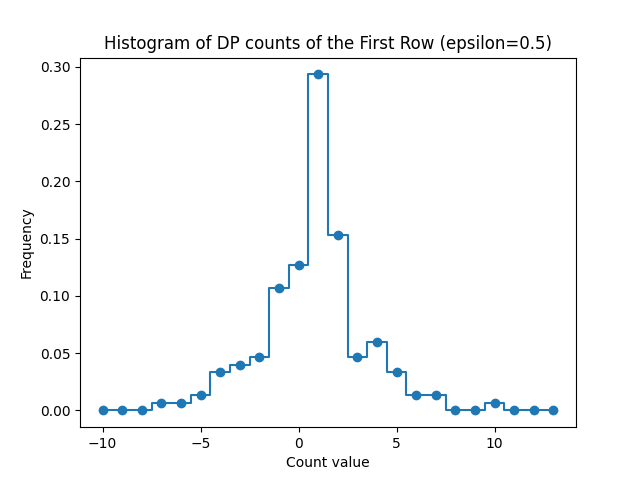

In [59]:
# Call the dp.py again with epsilon = 0.5 to generate and save the plot for submission
!python3 dp.py 0.5
# Display the generated plot
Image('dp-plot.png')